In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.ticker as ticker
data = 'data/data.csv'
file11 = 'data/file11.csv'

In [58]:
bardata = pd.read_csv(data)
piedata = pd.read_csv(data)
file_11 = pd.read_csv(file11)

In [34]:
bardata.drop(['TIME', 'FLIGHT#', 'AIRCRAFT_REG', 'CN_LN', 'SUMMARY_OF_EVENTS'], axis='columns', inplace=True)
bardata.dropna()
bardata.head()


,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [35]:
bardata.fillna(0, inplace=True)
bardata.head()

,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,0,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,0,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,0.0,0.0,0.0


In [36]:
bardata.drop(["LOCATION","OPERATOR","ROUTE","AIRCRAFT_TYPE","TOTAL_ONBOARD", "PASSENGER_ONBOARD","CREW_ONBOARD"], axis='columns', inplace=True)

In [37]:
bardata['DATE'] = pd.to_datetime(bardata.DATE)
bardata.head(10)
mean = bardata.groupby('DATE')['TOTAL_FATALITIES'].mean()
median = bardata.groupby('DATE')['TOTAL_FATALITIES'].median()
summary = pd.DataFrame({"Mean": mean, "Median": median})
summary

,Mean,Median
DATE,,
1908-09-17,1.0,1.0
1909-09-07,1.0,1.0
1912-07-12,5.0,5.0
1913-08-06,1.0,1.0
1913-09-09,14.0,14.0
...,...,...
2019-11-24,19.0,19.0
2019-12-27,13.0,13.0
2020-01-02,18.0,18.0


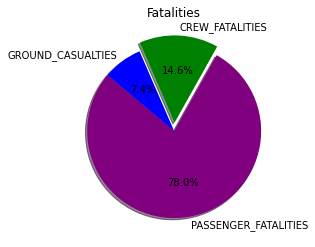

<Figure size 1440x720 with 0 Axes>

In [38]:
colors =["Purple", "Green", "Blue"]
number =[90229,16950,8530]
lables =["PASSENGER_FATALITIES", "CREW_FATALITIES", "GROUND_CASUALTIES"]
explode =(0, 0.1, 0)
plt.pie(number, explode=explode, labels=lables, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Fatalities")
plt.figure(figsize=(20,10))
plt.show()

In [39]:
piedata.drop(["LOCATION","OPERATOR","ROUTE","AIRCRAFT_TYPE","TOTAL_ONBOARD", "PASSENGER_ONBOARD","CREW_ONBOARD"], axis='columns', inplace=True)
piedata.drop(['TIME', 'FLIGHT#', 'AIRCRAFT_REG', 'CN_LN', 'SUMMARY_OF_EVENTS', 'PASSENGER_FATALITIES', 'CREW_FATALITIES', 'GROUND_CASUALTIES'], axis='columns', inplace=True)
piedata.head()

,DATE,TOTAL_FATALITIES
0,09/17/1908,1.0
1,09/07/1909,1.0
2,07/12/1912,5.0
3,08/06/1913,1.0
4,09/09/1913,14.0


In [42]:
piedata['DATE'] = pd.to_datetime(piedata.DATE)
piedata.groupby(pd.Grouper(key='DATE', freq = '10AS')).sum().reset_index()

,DATE,TOTAL_FATALITIES
0,1908-01-01,338.0
1,1918-01-01,489.0
2,1928-01-01,1667.0
3,1938-01-01,7066.0
4,1948-01-01,11681.0
5,1958-01-01,15600.0
6,1968-01-01,20278.0
7,1978-01-01,15974.0
8,1988-01-01,17768.0
9,1998-01-01,11749.0


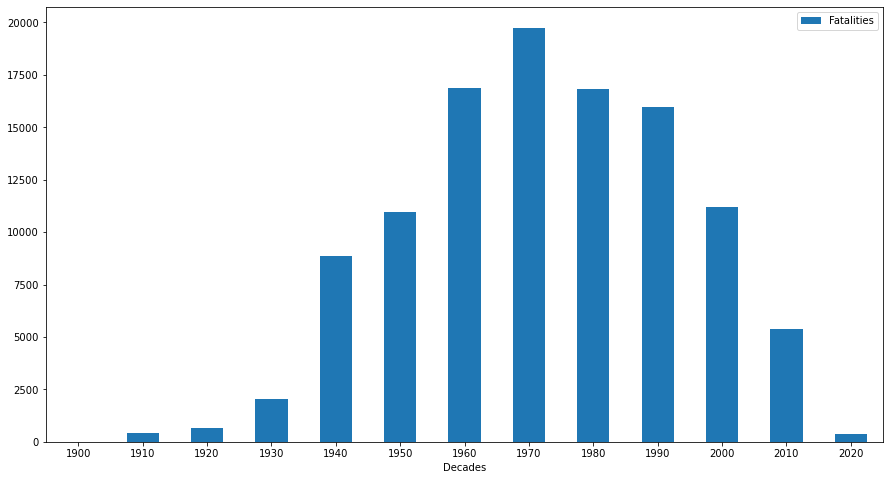

In [82]:

df = pd.DataFrame({'Decades':['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'], 'Fatalities':[2, 424, 647, 2033, 8881, 10959, 16884, 19751, 16847, 15984, 11174, 5366, 377]})
ax = df.plot.bar(x='Decades', y='Fatalities', figsize=(15,8), rot=0)